# In Class Notebook, Week 13

You can always access the notebook URL: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week13/inClass_week13.ipynb 

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## 1. Remaking the Mobility Dashboard with local data

In [1]:
myJekyllSaveDir = '/Users/jnaiman/jnaiman.github.io/assets/json/'

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [3]:
mobility_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/mobility.csv'

In [8]:
brush = alt.selection_interval(encodings=['x','y'])

rect_alt = alt.Chart(mobility_url).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_selection(
    brush
)

hist_alt = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q",bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

dashboard = rect_alt.properties(width=300) | hist_alt.properties(width=300)

In [9]:
dashboard

alt.HConcatChart(...)

In [10]:
dashboard.save(myJekyllSaveDir+'dashboard_all_in_altair.json')

Now we will use local data:

In [11]:
mobility = pd.read_csv(mobility_url)

In [12]:
mobility.head()

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
0,100,Johnson City,0.062199,TN,576081,1,0.021,0.090,0.035,0.030,...,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-82.436386,36.470371
1,200,Morristown,0.053652,TN,227816,1,0.020,0.093,0.026,0.028,...,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-83.407249,36.096539
2,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
3,302,Knoxville,0.056281,TN,727600,1,0.056,0.210,0.092,0.084,...,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-84.242790,35.952259
4,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276


In [13]:
brush = alt.selection_interval(encodings=['x','y'])

rect_alt = alt.Chart(mobility).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_selection(
    brush
)

hist_alt = alt.Chart(mobility).mark_bar().encode(
    alt.X("Mobility:Q",bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

dashboard_local = rect_alt.properties(width=300) | hist_alt.properties(width=300)

In [14]:
dashboard_local

alt.HConcatChart(...)

In [15]:
dashboard_local.save(myJekyllSaveDir+'dashboard_all_in_altair_local.json')

In [16]:
mobility_subset = mobility[['State', 'Student_teacher_ratio','Mobility']]

In [17]:
mobility_subset.head()

,State,Student_teacher_ratio,Mobility
0,TN,NaN,0.062199
1,TN,NaN,0.053652
2,TN,15.1,0.072635
3,TN,NaN,0.056281
4,NC,15.4,0.044801


In [18]:
brush = alt.selection_interval(encodings=['x','y'])

rect_alt = alt.Chart(mobility_subset).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_selection(
    brush
)

hist_alt = alt.Chart(mobility_subset).mark_bar().encode(
    alt.X("Mobility:Q",bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

dashboard_local_subset = rect_alt.properties(width=300) | hist_alt.properties(width=300)

In [19]:
dashboard_local_subset

alt.HConcatChart(...)

In [20]:
dashboard_local_subset.save(myJekyllSaveDir+'dashboard_all_in_altair_subset.json')

Quick tip: when using locally hosted data, think about if you can pass a small subset of your data to plot with.

## 2. Altair with the buildings dataset

In [21]:
buildings_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv'
buildings = pd.read_csv(buildings_url)

In [22]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


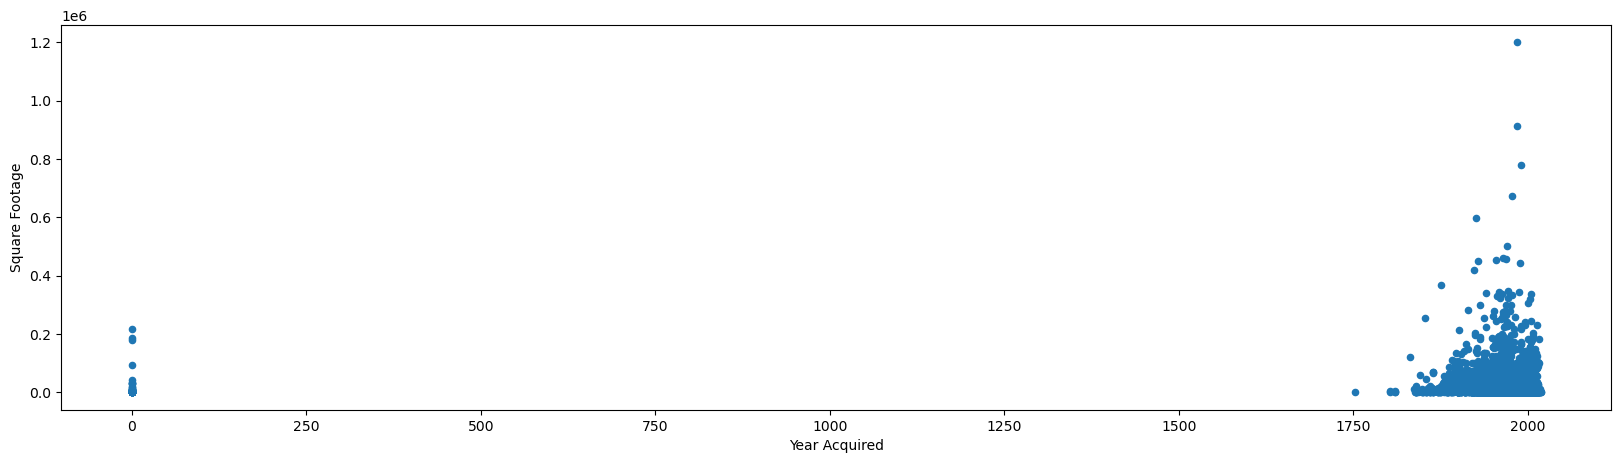

In [24]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter')
plt.show()

In [25]:
buildings.loc[buildings['Year Acquired']==0,'Year Acquired'] = np.nan

In [26]:
buildings.loc[buildings['Square Footage']==0,'Square Footage'] = np.nan

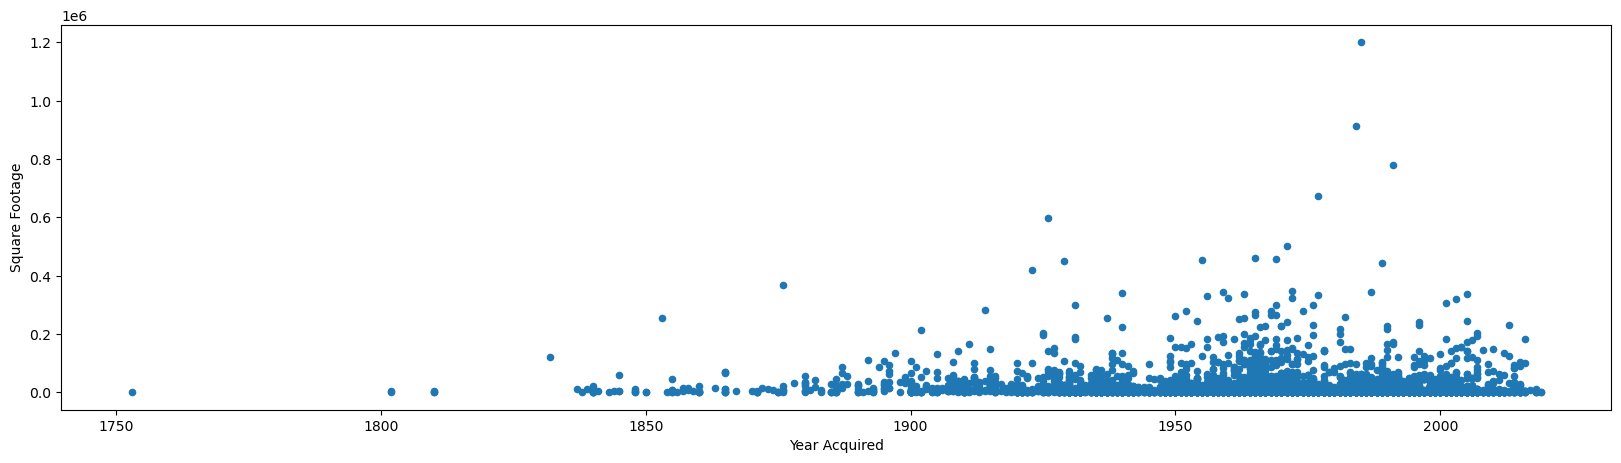

In [27]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter')
plt.show()

In [28]:
stats = buildings.groupby("Year Acquired")['Square Footage'].describe()

In [29]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


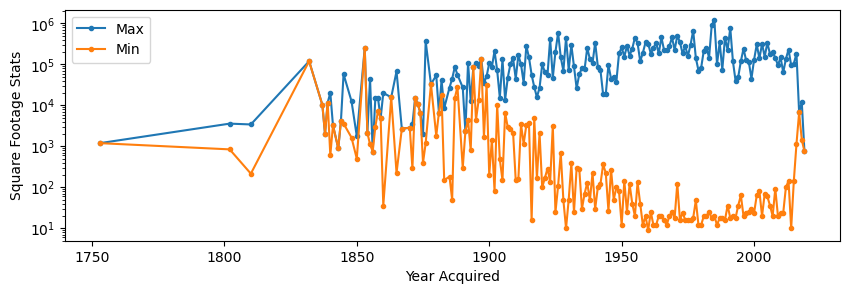

In [32]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(stats['max'],marker='.', label='Max')
ax.plot(stats['min'],marker='.',label='Min')
ax.set_yscale('log')
ax.set_xlabel('Year Acquired')
ax.set_ylabel('Square Footage Stats')
ax.legend()
plt.show()

In [33]:
lines = alt.Chart(stats).mark_line().encode(
    alt.X("Year Acquired:Q"),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

In [34]:
stats.reset_index()

,Year Acquired,count,mean,std,min,25%,50%,75%,max
0,1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1,1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
2,1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
3,1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
4,1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...,...
166,2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
167,2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
168,2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0
169,2018.0,4.0,4290.000000,5153.644342,1455.0,1455.0,1852.5,4687.50,12000.0


In [35]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:Q"),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

In [36]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

In [38]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [39]:
stats.index = pd.to_datetime(stats.index.astype('int'),format='%Y')

In [40]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753-01-01,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802-01-01,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810-01-01,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832-01-01,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837-01-01,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015-01-01,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016-01-01,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017-01-01,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0
